In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [12]:
path = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'

data = pd.read_csv(path, sep=',')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.shape

(200, 5)

In [14]:
data = data.rename(columns = {'CustomerID':'Id', 'Gender': 'Genero', 'Age': 'Idade', 'Annual Income (k$)':'RendaAnual', 'Spending Score (1-100)':'pontuacao'})
data.head()

,Id,Genero,Idade,RendaAnual,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


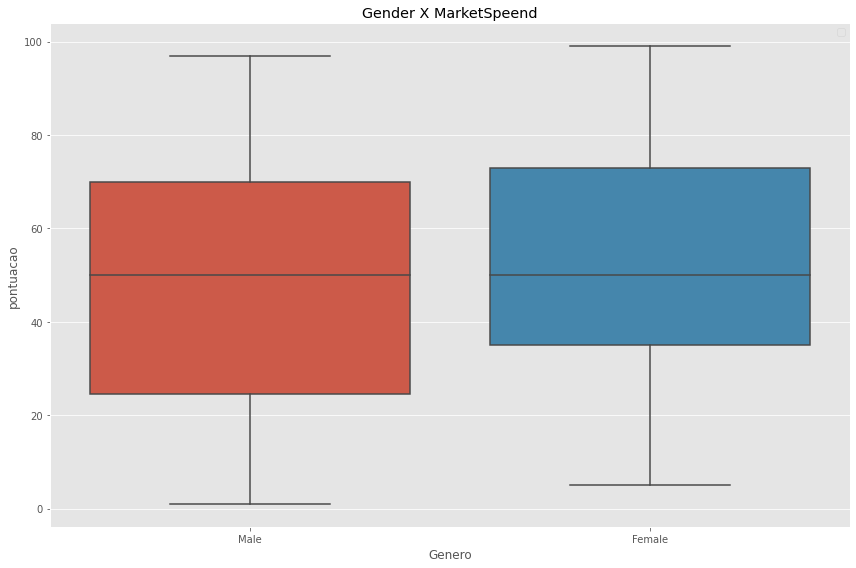

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.title('Gender X MarketSpeend')
sns.boxplot(x=data.Genero, y=data.pontuacao)
plt.legend()
plt.tight_layout()

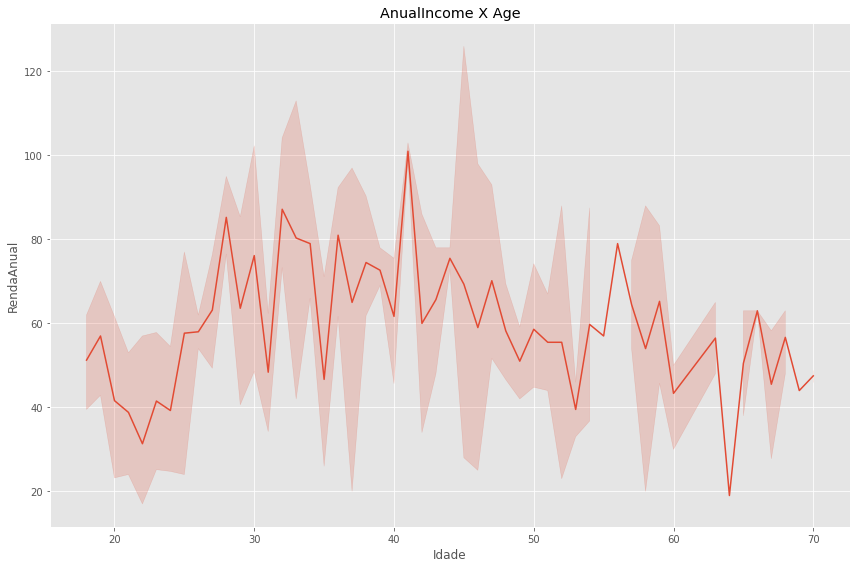

In [16]:
plt.figure(figsize=(12,8))
plt.title('AnualIncome X Age')
sns.lineplot(x=data.Idade, y=data.RendaAnual)
plt.tight_layout()

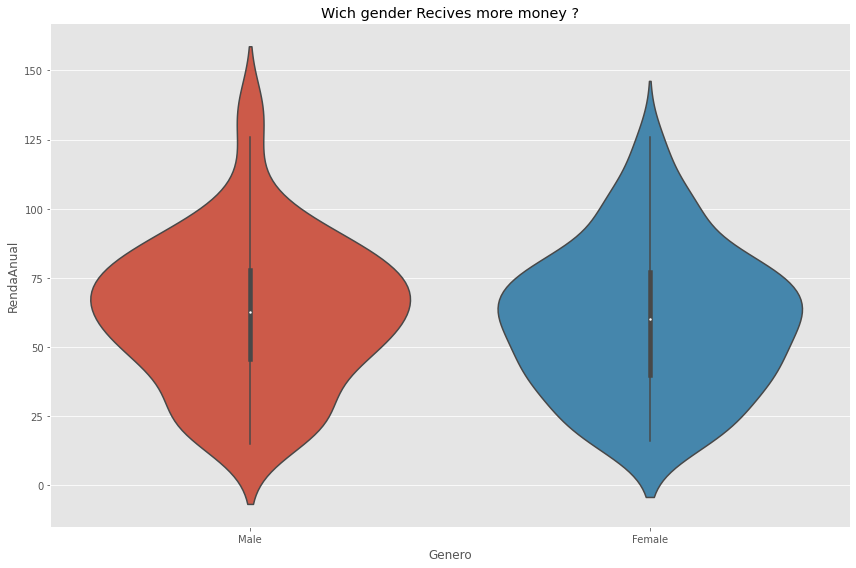

In [17]:
plt.figure(figsize=(12,8))
plt.title('Wich gender Recives more money ?')
sns.violinplot(x=data.Genero, y=data.RendaAnual)
plt.tight_layout()

In [18]:
bins = [1, 20, 21, 40, 41, 60, 61, 80, 81, 99]
bin_names = ['PP','PP1', 'P','P1', 'M','M1', 'G','G1', 'GG' 'GG1']

data['pontuacao_labels2'] = pd.cut(np.array(data.pontuacao), bins=bins, labels=bin_names)


In [19]:
data.head()

,Id,Genero,Idade,RendaAnual,pontuacao,pontuacao_labels2
0,1,Male,19,15,39,P
1,2,Male,21,15,81,G1
2,3,Female,20,16,6,PP
3,4,Female,23,16,77,G
4,5,Female,31,17,40,P


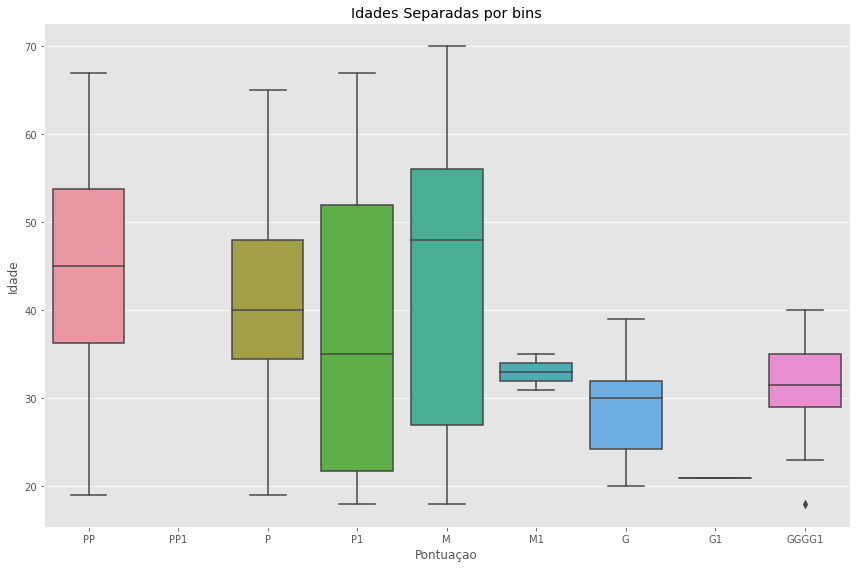

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data.pontuacao_labels2, y=data.Idade)
plt.title('Idades Separadas por bins')
plt.xlabel("Pontuaçao")
plt.tight_layout()

In [ ]:
data.head()

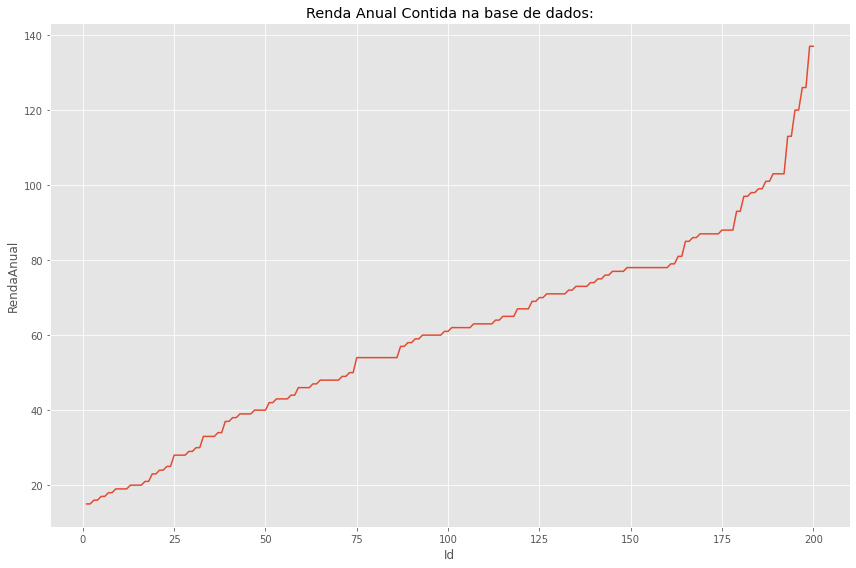

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data.Id, y=data.RendaAnual)
plt.title("Renda Anual Contida na base de dados:")
plt.tight_layout()

In [22]:
data.sort_values(by='pontuacao', ascending=False)

,Id,Genero,Idade,RendaAnual,pontuacao,pontuacao_labels2
11,12,Female,35,19,99,GGGG1
19,20,Female,35,23,98,GGGG1
145,146,Male,28,77,97,GGGG1
185,186,Male,30,99,97,GGGG1
127,128,Male,40,71,95,GGGG1
...,...,...,...,...,...,...
30,31,Male,60,30,4,PP
32,33,Male,53,33,4,PP
8,9,Male,64,19,3,PP
158,159,Male,34,78,1,NaN


In [23]:
id_ = data.Id
data.drop('Id', axis=1, inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Homens - 1
# Mulheres - 0

le = LabelEncoder()
data.Genero = le.fit_transform(data.Genero)

In [25]:

data.drop('pontuacao_labels2', axis=1, inplace=True)

In [26]:
data.head()

,Genero,Idade,RendaAnual,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


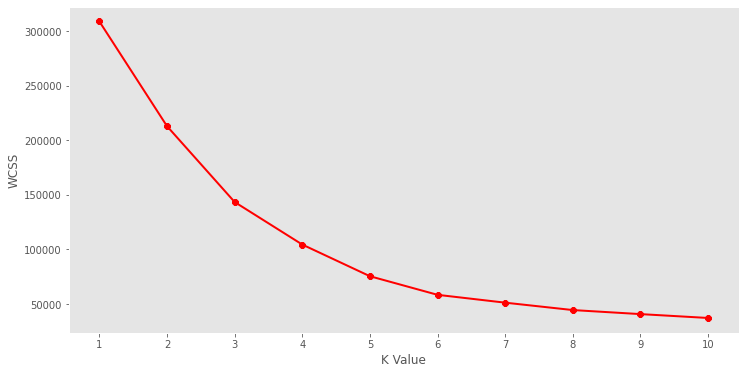

In [27]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,0:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [28]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(data.iloc[:,0:])
preds = model.predict(data.iloc[:,0:])

In [29]:
data.iloc[1:2]

,Genero,Idade,RendaAnual,pontuacao
1,1,21,15,81


In [30]:
preds

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [31]:
pred_values =  pd.DataFrame(preds, columns=['Group'])
pred_values.head()

,Group
0,4
1,3
2,4
3,3
4,4


In [32]:
data = pd.concat([data, pred_values], axis=1)
data.head()

,Genero,Idade,RendaAnual,pontuacao,Group
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


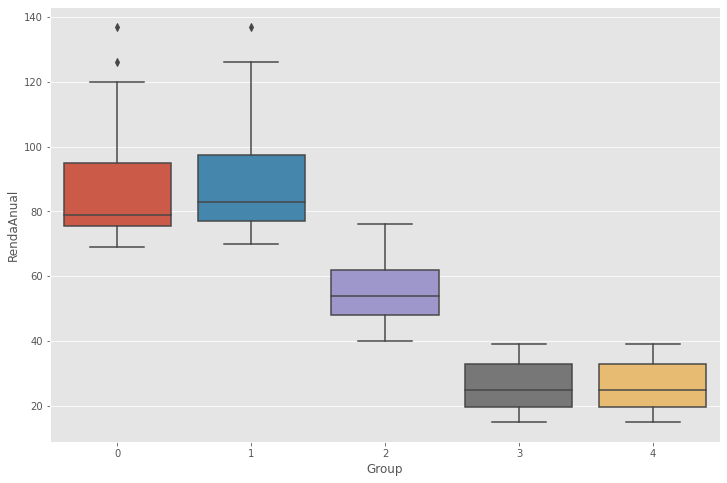

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x=data.Group, y= data.RendaAnual)

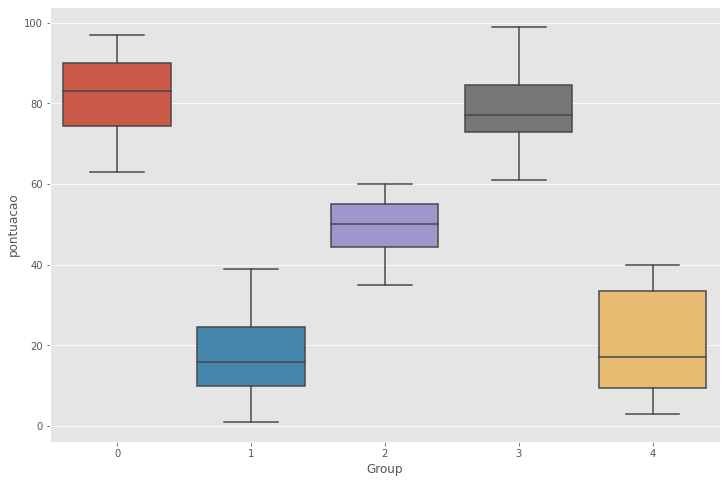

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data.Group, y= data.pontuacao)

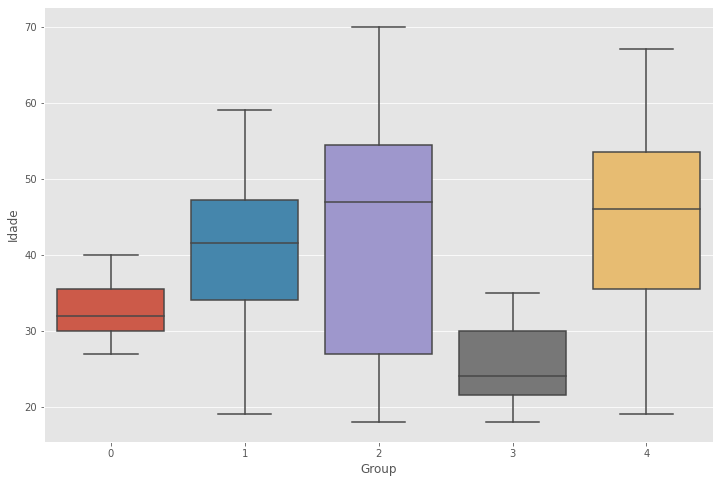

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data.Group, y= data.Idade)

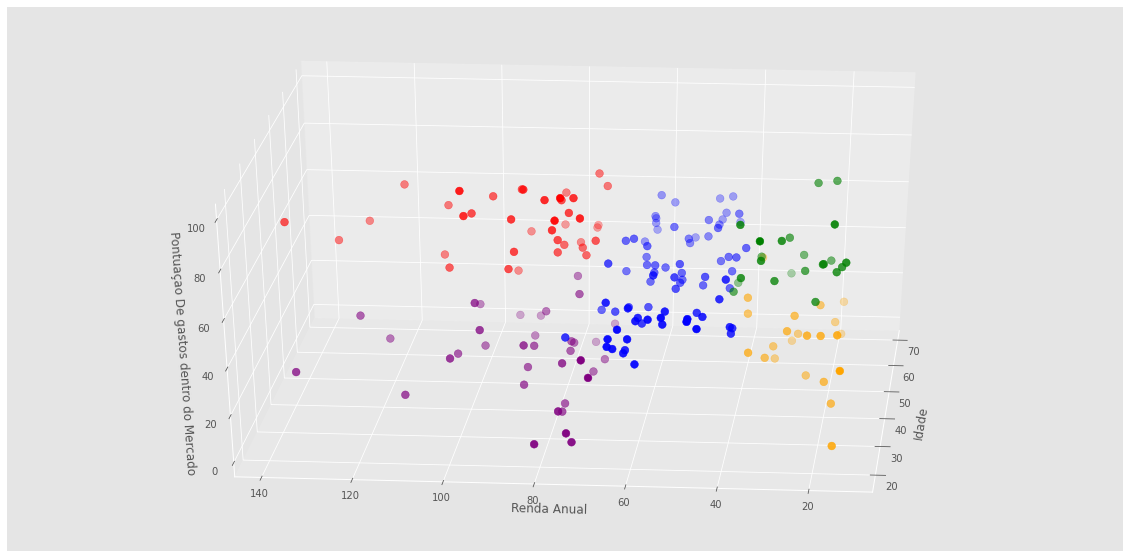

In [36]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Idade[data.label == 0], data["RendaAnual"][data.label == 0], data["pontuacao"][data.label == 0], c='blue', s=60)
ax.scatter(data.Idade[data.label == 1], data["RendaAnual"][data.label == 1], data["pontuacao"][data.label == 1], c='red', s=60)
ax.scatter(data.Idade[data.label == 2], data["RendaAnual"][data.label == 2], data["pontuacao"][data.label == 2], c='green', s=60)
ax.scatter(data.Idade[data.label == 3], data["RendaAnual"][data.label == 3], data["pontuacao"][data.label == 3], c='orange', s=60)
ax.scatter(data.Idade[data.label == 4], data["RendaAnual"][data.label == 4], data["pontuacao"][data.label == 4], c='purple', s=60)
#ax.scatter(data.Idade[data.label == 5], data["RendaAnual"][data.label == 5], data["pontuacao"][data.label == 5], c='grey', s=60)
ax.view_init(30, 185)
plt.xlabel("Idade")
plt.ylabel("Renda Anual")
ax.set_zlabel('Pontuaçao De gastos dentro do Mercado')
plt.show()

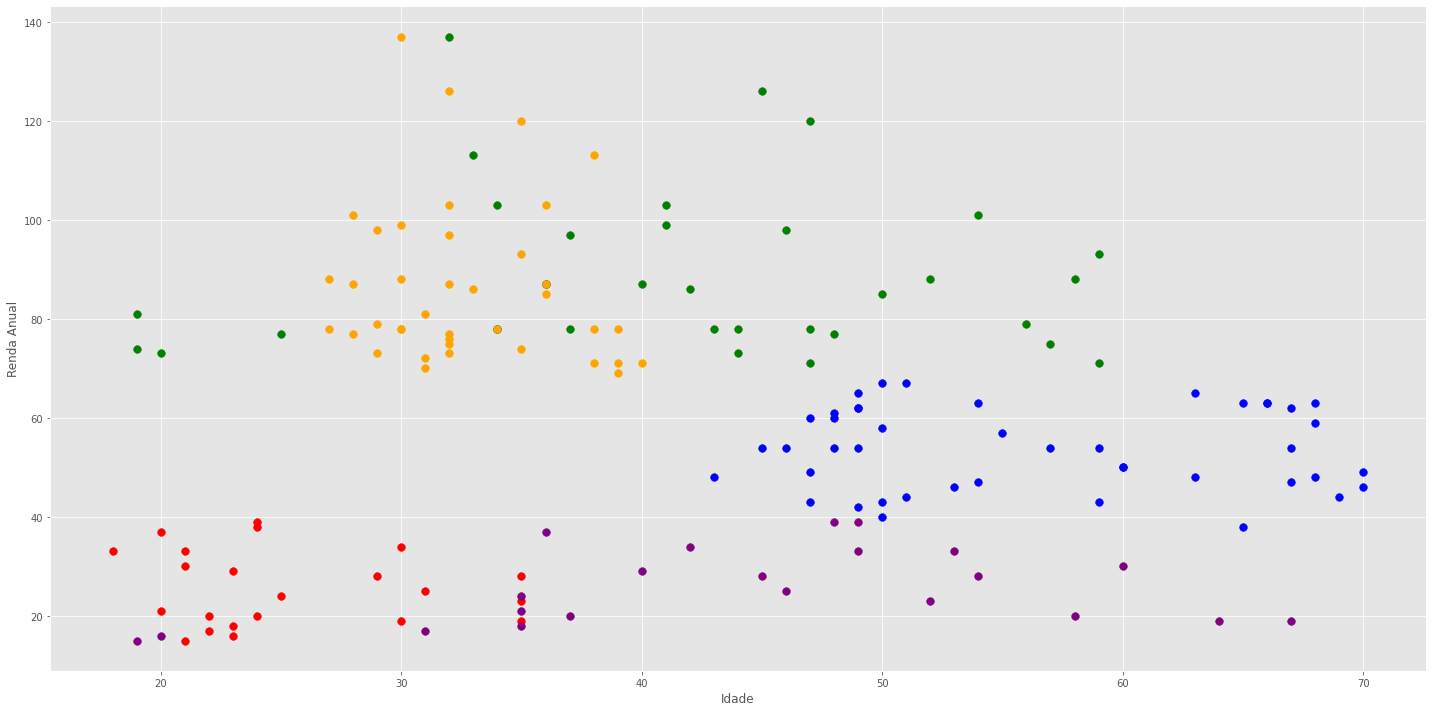

In [37]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(data.iloc[:,0:])
data["label"] = clusters


 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(data.Idade[data.label == 0], data["RendaAnual"][data.label == 0], c='blue', s=60)
ax.scatter(data.Idade[data.label == 1], data["RendaAnual"][data.label == 1], c='red', s=60)
ax.scatter(data.Idade[data.label == 2], data["RendaAnual"][data.label == 2], c='green', s=60)
ax.scatter(data.Idade[data.label == 3], data["RendaAnual"][data.label == 3], c='orange', s=60)
ax.scatter(data.Idade[data.label == 4], data["RendaAnual"][data.label == 4], c='purple', s=60)
#ax.scatter(data.Idade[data.label == 5], data["RendaAnual"][data.label == 5], c='grey', s=60)
plt.xlabel("Idade")
plt.ylabel("Renda Anual")
plt.tight_layout()

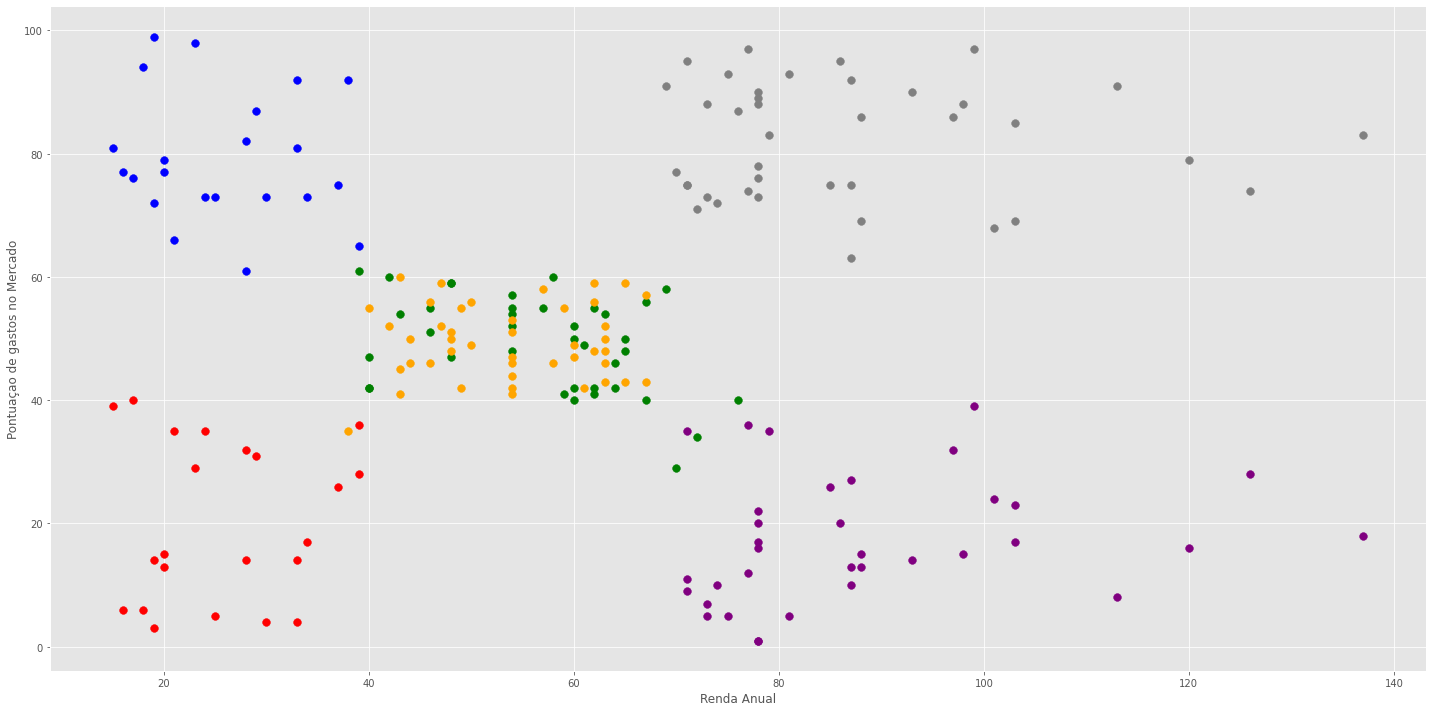

In [38]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(data.iloc[:,0:])
data["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(data["RendaAnual"][data.label == 0], data["pontuacao"][data.label == 0], c='blue', s=60)
ax.scatter(data["RendaAnual"][data.label == 1], data["pontuacao"][data.label == 1], c='red', s=60)
ax.scatter(data["RendaAnual"][data.label == 2], data["pontuacao"][data.label == 2], c='green', s=60)
ax.scatter(data["RendaAnual"][data.label == 3], data["pontuacao"][data.label == 3], c='orange', s=60)
ax.scatter(data["RendaAnual"][data.label == 4], data["pontuacao"][data.label == 4], c='purple', s=60)
ax.scatter(data["RendaAnual"][data.label == 5], data["pontuacao"][data.label == 5],c='grey', s=60)
plt.xlabel("Renda Anual")
plt.ylabel("Pontuaçao de gastos no Mercado")
plt.tight_layout()

In [40]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [39]:
data.head()

,Genero,Idade,RendaAnual,pontuacao,Group,label
0,1,19,15,39,4,1
1,1,21,15,81,3,0
2,0,20,16,6,4,1
3,0,23,16,77,3,0
4,0,31,17,40,4,1


In [41]:
model = joblib.load('model.pkl')
print("import the model!")

Sucefull import the model!
